# Loading the IMDB dataset


In [1]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
F:\Anaconda3\lib\site-packages\keras\datasets\imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
F:\Anaconda3\lib\site-packages\keras\datasets\imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating t

In [2]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [3]:
 train_labels[0]

1

In [4]:
max([max(sequence) for sequence in train_data])

9999

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])

# Encoding the integer sequences into a binary matrix

In [6]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [8]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# The model definition

In [9]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compiling the model

In [10]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

# Configuring the optimizer

In [11]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss='binary_crossentropy',
metrics=['accuracy'])

F:\Anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


# Using custom losses and metrics

In [12]:
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss=losses.binary_crossentropy,
metrics=[metrics.binary_accuracy])

# Setting aside a validation set


In [13]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Training your model

In [14]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 44s 113ms/step - loss: 0.6118 - acc: 0.7027 - val_loss: 0.4172 - val_acc: 0.8719
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3561 - acc: 0.8992 - val_loss: 0.3199 - val_acc: 0.8871
Epoch 3/20
30/30 [==============================] - 1s 30ms/step - loss: 0.2442 - acc: 0.9310 - val_loss: 0.2840 - val_acc: 0.8903
Epoch 4/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1884 - acc: 0.9427 - val_loss: 0.2745 - val_acc: 0.8899
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1493 - acc: 0.9552 - val_loss: 0.2811 - val_acc: 0.8873
Epoch 6/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1176 - acc: 0.9660 - val_loss: 0.3100 - val_acc: 0.8771
Epoch 7/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1063 - acc: 0.9696 - val_loss: 0.3048 - val_acc: 0.8826
Epoch 8/20
30/30 [==============================] - 1s 30ms/step - loss: 0.0863 -

In [21]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

# Plotting the training and validation loss

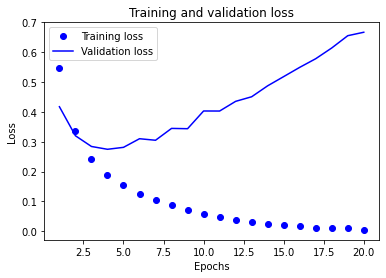

In [24]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['acc']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting the training and validation accuracy

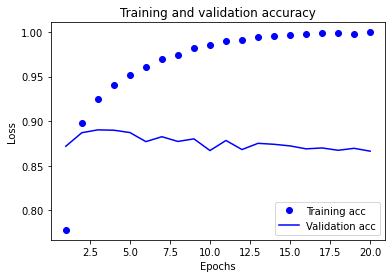

In [27]:
plt.clf()
acc_values = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, history_dict['acc'], 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Retraining a model from scratch

In [31]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train, epochs=20, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/20
49/49 [==============================] - 19s 34ms/step - loss: 0.5466 - accuracy: 0.7243
Epoch 2/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2635 - accuracy: 0.9109
Epoch 3/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2026 - accuracy: 0.9309
Epoch 4/20
49/49 [==============================] - 1s 21ms/step - loss: 0.1597 - accuracy: 0.9442
Epoch 5/20
49/49 [==============================] - 1s 21ms/step - loss: 0.1364 - accuracy: 0.9536
Epoch 6/20
49/49 [==============================] - 1s 21ms/step - loss: 0.1177 - accuracy: 0.9621
Epoch 7/20
49/49 [==============================] - 1s 23ms/step - loss: 0.1037 - accuracy: 0.9669
Epoch 8/20
49/49 [==============================] - 1s 22ms/step - loss: 0.0869 - accuracy: 0.9728
Epoch 9/20
49/49 [==============================] - 1s 21ms/step - loss: 0.0800 - accuracy: 0.9753
Epoch 10/20
49/49 [==============================] - 1s 21ms/step - loss: 0.0712 - accuracy: 0.9790
Epoch 11

In [32]:
results

[0.8039412498474121, 0.8490800261497498]

In [33]:
model.predict(x_test)

array([[0.00381419],
       [1.        ],
       [0.9466969 ],
       ...,
       [0.08091709],
       [0.002839  ],
       [0.89769626]], dtype=float32)